# Question 3 : Visual story telling part 1: green buildings

Though stats guru's conclusion seems fair at first glance, but we are not completely satisfied with it. Despite the logical reasoning behind the guru's assertions, their methodology neglects the potential impact of the remaining 21 variables that could have contributed to a more comprehensive analysis. Let's revisit the analysis and assumptions made by the stats guru and evaluate the effect of other variables as well.

In [8]:
import pandas as pd                 # For working with dataframes and data manipulation
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns               # Enhanced data visualization
import statsmodels.api as sm

In [20]:
df = pd.read_csv('greenbuildings.csv')
df

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


Lets first evaluate the buildings removed by stats guru with less than 10% occupancy rate.

In [5]:
df[df['leasing_rate'] == 0].shape

(152, 23)

Since there are 152 buildings with 0 occupancy rates, which makes around 2% of the total building. It may be in renovation, or in making so we can safely avoid these

In [7]:
df[(df['leasing_rate'] > 0) & (df['leasing_rate'] < 10)].shape

(63, 23)

Since there are 63 buildings with less than 10% occupancy rates, we can remove these as well. 

In total, we are moving all buildings with less than 10% occupancy rates, which makes sense in real world, since we are just removing 2.7% buildings on grounds of renovation, building in making, or something weird going on. 

In [21]:
df_new = df[df['leasing_rate'] > 10]
df_new  #taking new dataframe, removing the buildings with less than 10% occupancy

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


Now, lets see whether taking the median of rent, instead of mean makes sense or not.

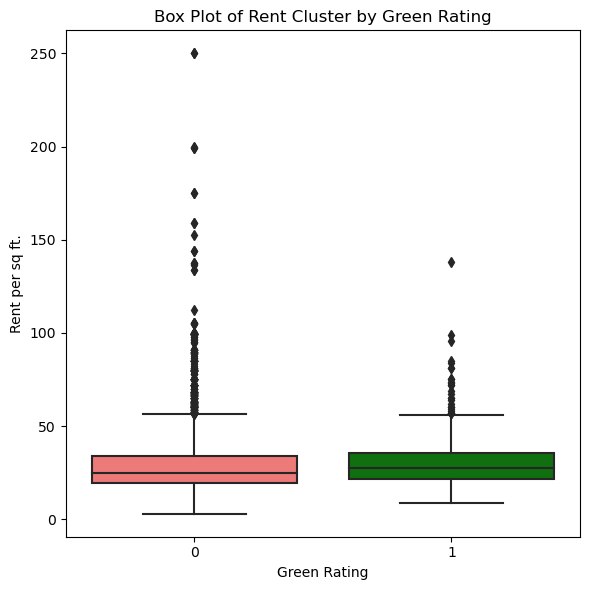

Rent Variance with Green Rating


,median,mean
green_rating,,
0,25.03,28.444779
1,27.60,30.028480


In [72]:
color_palette = { 1: 'green',0: '#FF6865'}
plt.figure(figsize=(6, 6))
sns.boxplot(x='green_rating', y='Rent', data=df_new, palette=color_palette)
plt.xlabel('Green Rating')
plt.ylabel('Rent per sq ft.')
plt.title('Box Plot of Rent Cluster by Green Rating')
plt.tight_layout()

# Show the box plot
plt.show()

print('Rent Variance with Green Rating')
df_new.groupby('green_rating')['Rent'].agg(['median', 'mean'])

Since, the non-green buildings have very high number and amount of outliers, taking the median here makes more sense, as suggested by the stats guru.

Now, lets try to find the impact of Age, Occupancy Rates, etc on the Rent.

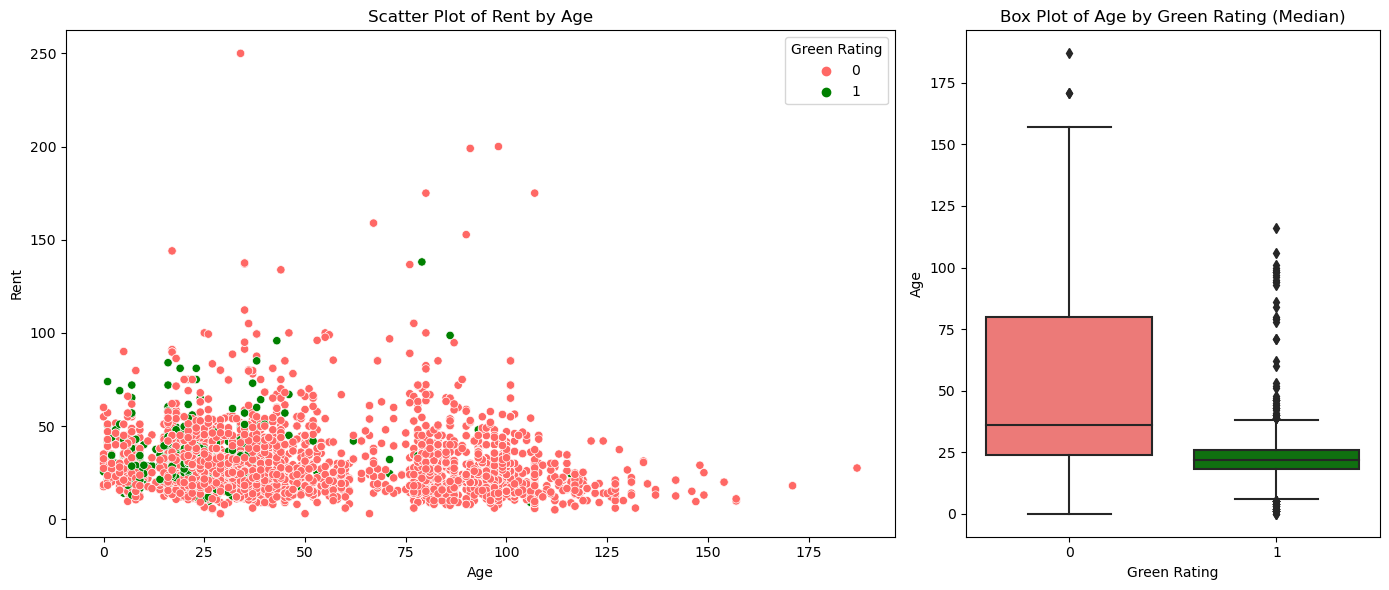

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

sns.scatterplot(x='age', y='Rent', hue='green_rating', data=df_new, ax=axes[0], palette=color_palette)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Rent')
axes[0].set_title('Scatter Plot of Rent by Age')
axes[0].legend(title='Green Rating')

# Box plot (right subplot)
sns.boxplot(y='age',x= 'green_rating', data=df_new, ax=axes[1], palette=color_palette)
axes[1].set_xlabel('Green Rating')
axes[1].set_ylabel('Age')
axes[1].set_title('Box Plot of Age by Green Rating (Median)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Green buildings are generally newer, and the median age of them is also comparitively lesser than the non-green buildings. But, not much can be said about the impact of age on rent. So lets understand further data to see the impact of newer and green buildings on Occupancy and Rent

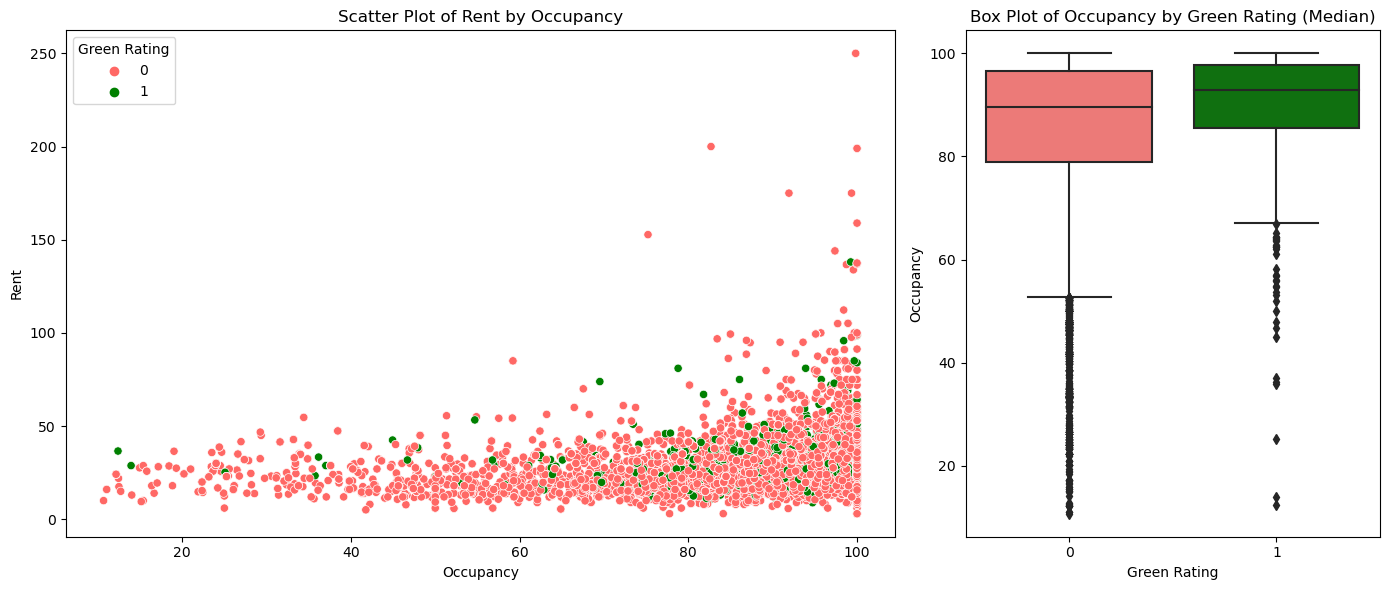

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

sns.scatterplot(x='leasing_rate', y='Rent', hue='green_rating', data=df_new, ax=axes[0], palette=color_palette)
axes[0].set_xlabel('Occupancy')
axes[0].set_ylabel('Rent')
axes[0].set_title('Scatter Plot of Rent by Occupancy')
axes[0].legend(title='Green Rating')

# Box plot (right subplot)
sns.boxplot(y='leasing_rate',x= 'green_rating', data=df_new, ax=axes[1], palette=color_palette)
axes[1].set_xlabel('Green Rating')
axes[1].set_ylabel('Occupancy')
axes[1].set_title('Box Plot of Occupancy by Green Rating (Median)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


From the scatter plot, we can see that there is a subtle increase in Rent on increasing in Occupancy Rate, and generally most of the green buildings have an occupancy of greater than 65%. And from our previous analysis, we also know that the Rent for them is also higher. So the assumptions made by stats guru seems fair. 

Now, lets find out the Confounding Variables.

Firstly, checking Age.

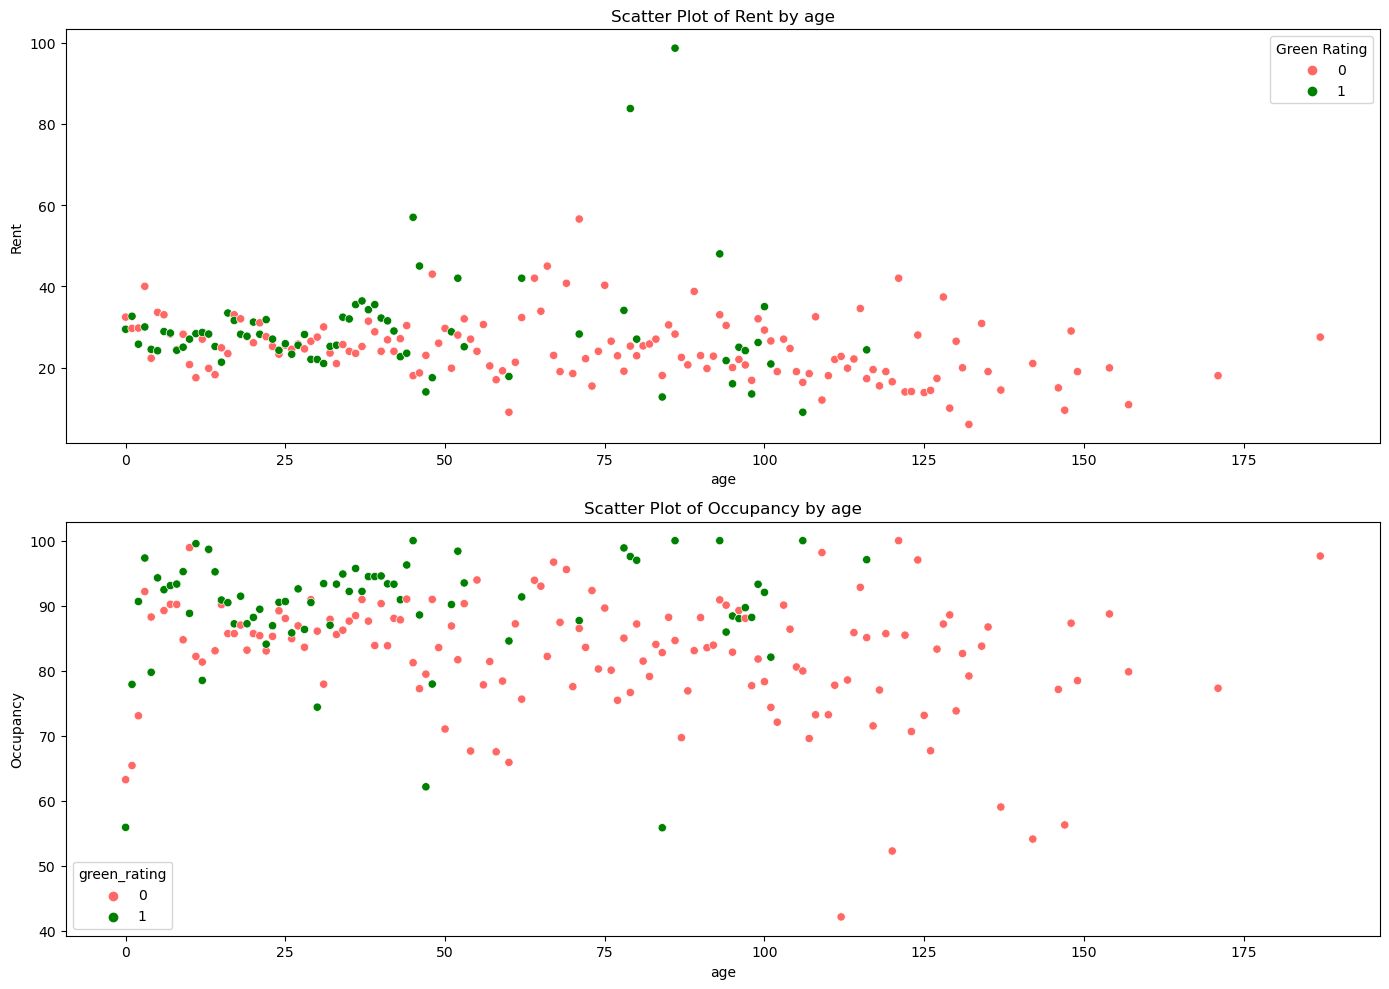

,age,Rent,leasing_rate,CS_PropertyID
green_rating,,,,
0,36.0,25.03,84.440520,6995
1,22.0,27.60,89.412427,684


In [140]:
age_effect = df_new.groupby(['age','green_rating']).agg({'Rent':'median','leasing_rate':'mean','CS_PropertyID':'count'}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

sns.scatterplot(x='age', y='Rent', hue='green_rating', data=age_effect, ax=axes[0], palette=color_palette)
axes[0].set_xlabel('age')
axes[0].set_ylabel('Rent')
axes[0].set_title('Scatter Plot of Rent by age')
axes[0].legend(title='Green Rating')

# Box plot (right subplot)
sns.scatterplot(x='age', y='leasing_rate', hue='green_rating', data=age_effect, ax=axes[1], palette=color_palette)
axes[1].set_xlabel('age')
axes[1].set_ylabel('Occupancy')
axes[1].set_title('Scatter Plot of Occupancy by age')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


df_new.groupby('green_rating').agg({'age':'median' , 'Rent':'median','leasing_rate':'mean','CS_PropertyID':'count'})

Nothing concrete can be found from here, except the fact, green buildings are more occupied, and doesnt get affected by the age of the building.

Now, checking the effect of class_a

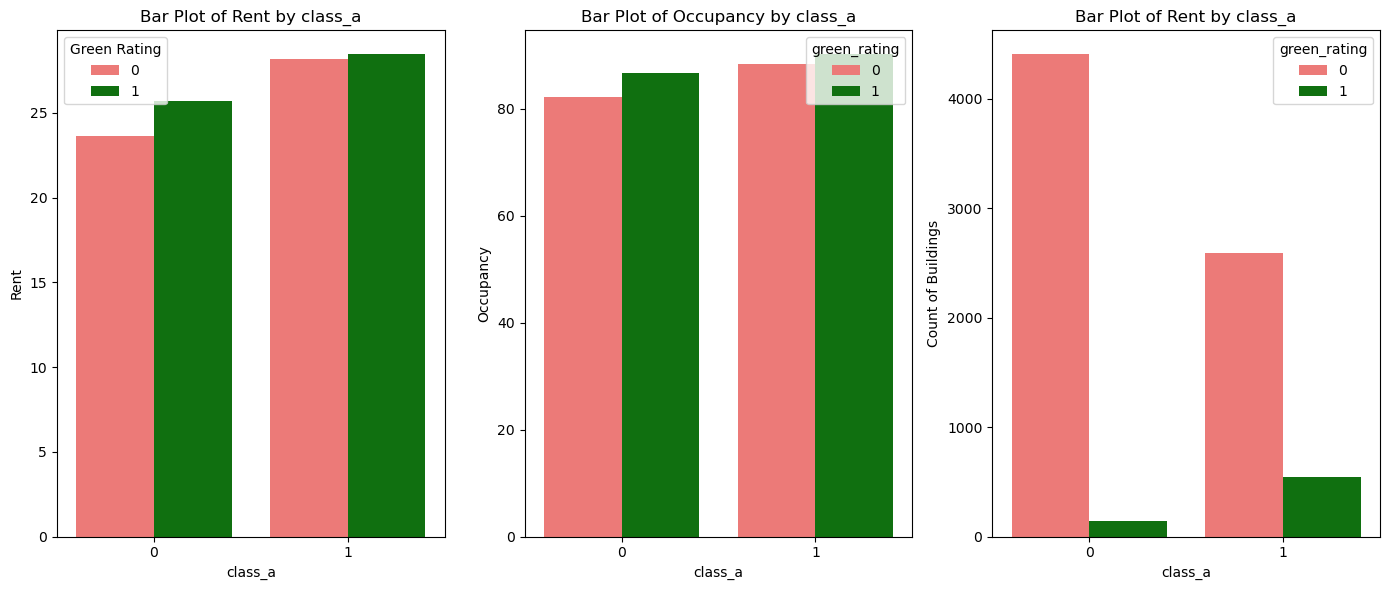

We have taken Median of Rent and Average of Occupancy


,class_a,green_rating,Rent,leasing_rate,CS_PropertyID
0,0,0,23.650,82.150177,4406
1,0,1,25.675,86.589638,138
2,1,0,28.200,88.338262,2589
3,1,1,28.440,90.125879,546


In [105]:
class_effect = df_new.groupby(['class_a','green_rating']).agg({'Rent':'median','leasing_rate':'mean','CS_PropertyID':'count'}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.barplot(x='class_a', y='Rent', hue='green_rating', data=class_effect, ax=axes[0], palette=color_palette)
axes[0].set_xlabel('class_a')
axes[0].set_ylabel('Rent')
axes[0].set_title('Bar Plot of Rent by class_a')
axes[0].legend(title='Green Rating')


sns.barplot(x='class_a', y='leasing_rate', hue='green_rating', data=class_effect, ax=axes[1], palette=color_palette)
axes[1].set_xlabel('class_a')
axes[1].set_ylabel('Occupancy')
axes[1].set_title('Bar Plot of Occupancy by class_a')

sns.barplot(x='class_a', y='CS_PropertyID', hue='green_rating', data=class_effect, ax=axes[2], palette=color_palette)
axes[2].set_xlabel('class_a')
axes[2].set_ylabel('Count of Buildings')
axes[2].set_title('Bar Plot of Rent by class_a')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

print('We have taken Median of Rent and Average of Occupancy')
class_effect

There is a significant increase in Rent for class_a buildings for both green and non-green buildings, but the presence of class_a in the green buildings doesn't have much impact.

Although, most of the green buildings are not class_a, so if we aim to make class_a buildings, we can benefit improved rent with more desriability.

Let's check the impact of Amenities now:

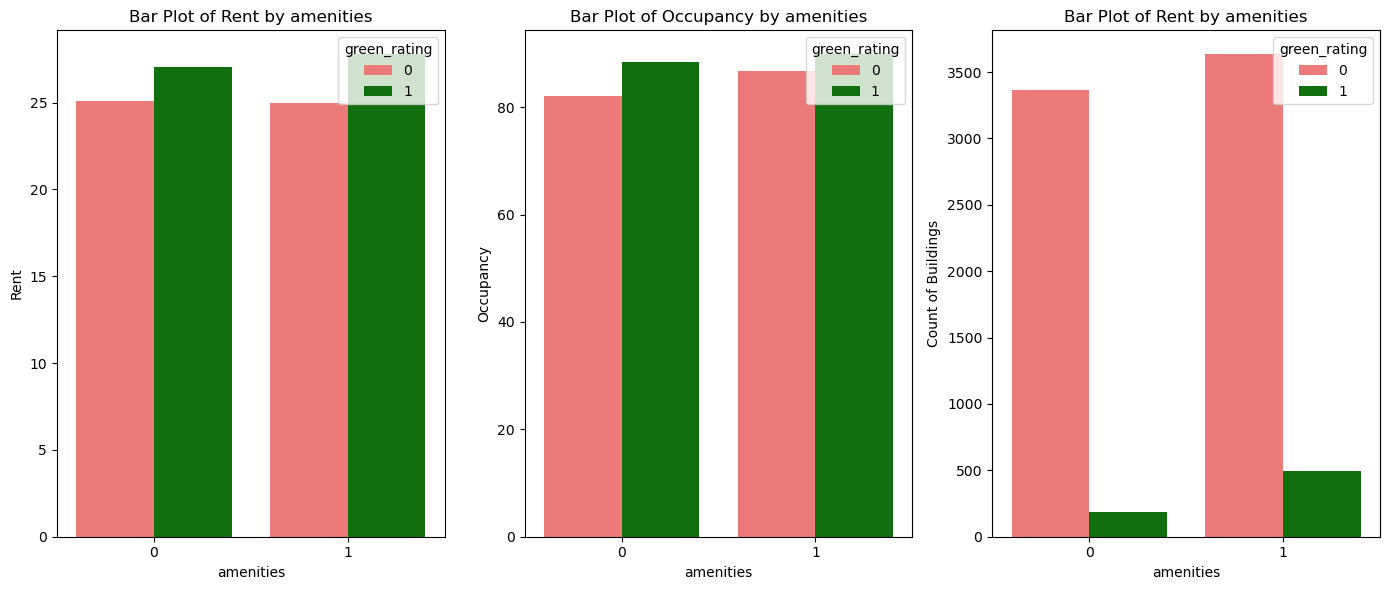

We have taken Median of Rent and Average of Occupancy


,amenities,green_rating,Rent,leasing_rate,CS_PropertyID
0,0,0,25.070,81.996404,3362
1,0,1,27.045,88.347634,186
2,1,0,25.000,86.702320,3633
3,1,1,27.775,89.810120,498


In [116]:
amenity_effect = df_new.groupby(['amenities','green_rating']).agg({'Rent':'median','leasing_rate':'mean','CS_PropertyID':'count'}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.barplot(x='amenities', y='Rent', hue='green_rating', data=amenity_effect, ax=axes[0], palette=color_palette)
axes[0].set_xlabel('amenities')
axes[0].set_ylabel('Rent')
axes[0].set_title('Bar Plot of Rent by amenities')


sns.barplot(x='amenities', y='leasing_rate', hue='green_rating', data=amenity_effect, ax=axes[1], palette=color_palette)
axes[1].set_xlabel('amenities')
axes[1].set_ylabel('Occupancy')
axes[1].set_title('Bar Plot of Occupancy by amenities')
# axes[1].legend(title='Green Rating')

sns.barplot(x='amenities', y='CS_PropertyID', hue='green_rating', data=amenity_effect, ax=axes[2], palette=color_palette)
axes[2].set_xlabel('amenities')
axes[2].set_ylabel('Count of Buildings')
axes[2].set_title('Bar Plot of Rent by amenities')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

print('We have taken Median of Rent and Average of Occupancy')
amenity_effect

Having the amenities has a major impact on the the rent and occupancy, the developer should try to include amenities in the building.

Also, checking the impact the impact of number of stories.

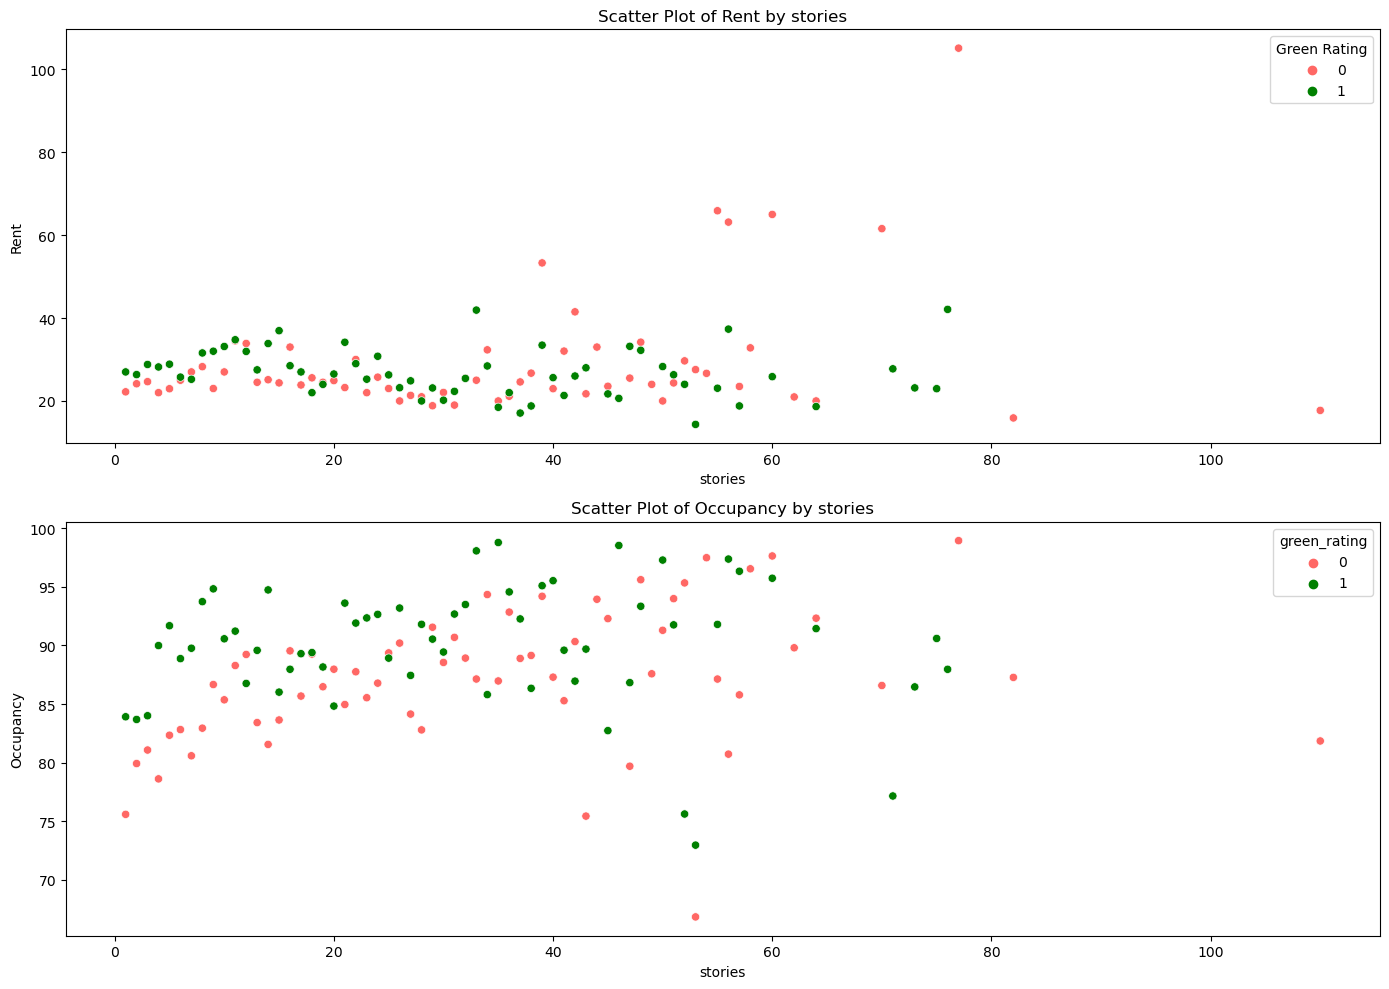

green_rating
0    10.0
1    11.0
Name: stories, dtype: float64

In [144]:
storey_effect = df_new.groupby(['stories','green_rating']).agg({'Rent':'median','leasing_rate':'mean','CS_PropertyID':'count'}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

sns.scatterplot(x='stories', y='Rent', hue='green_rating', data=storey_effect, ax=axes[0], palette=color_palette)
axes[0].set_xlabel('stories')
axes[0].set_ylabel('Rent')
axes[0].set_title('Scatter Plot of Rent by stories')
axes[0].legend(title='Green Rating')

# Box plot (right subplot)
sns.scatterplot(x='stories', y='leasing_rate', hue='green_rating', data=storey_effect, ax=axes[1], palette=color_palette)
axes[1].set_xlabel('stories')
axes[1].set_ylabel('Occupancy')
axes[1].set_title('Scatter Plot of Occupancy by stories')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

df_new.groupby('green_rating')['stories'].median()

Stories seems to have a impact on the occupancy and rent of buildings, the occupancy of green buildings significantly increases with tall buildings, whereas the rent increases slightly for green buildings.

Lets now check size for being a confounding variable

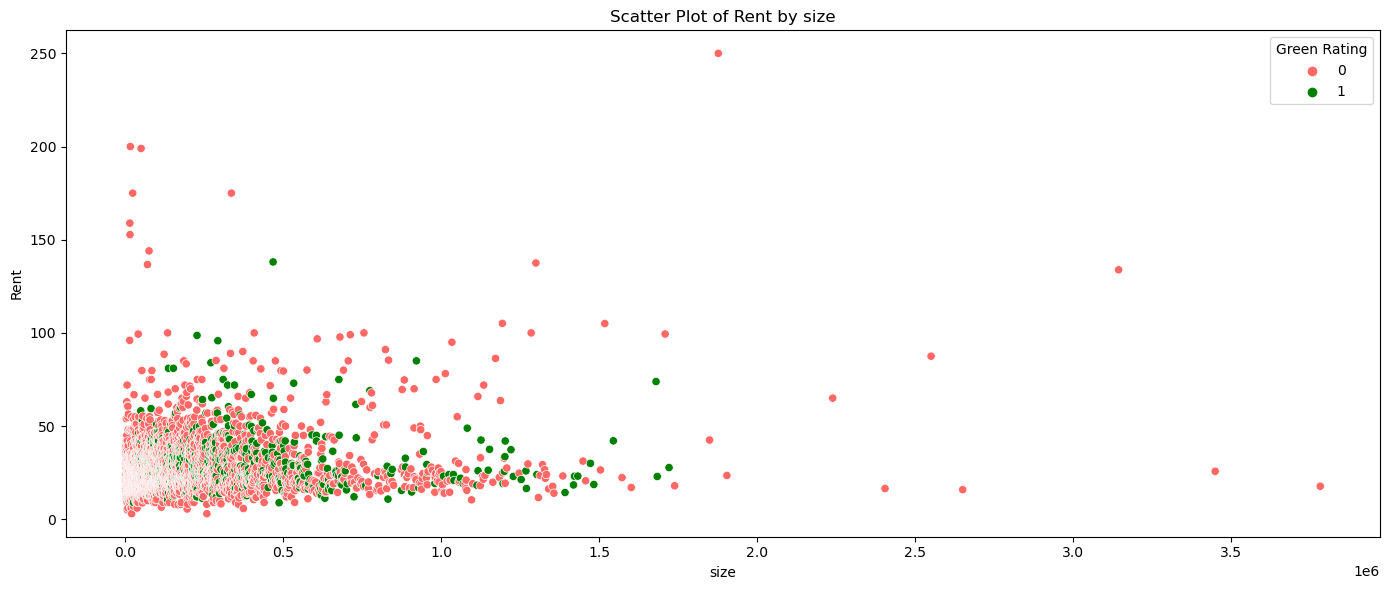

green_rating
0    123250.0
1    241199.0
Name: size, dtype: float64

In [217]:
size_effect = df_new.groupby(['size','green_rating']).agg({'Rent':'median','leasing_rate':'mean','CS_PropertyID':'count'}).reset_index().sort_values('size')

plt.figure(figsize=(14, 6))

sns.scatterplot(x='size', y='Rent', hue='green_rating', data=size_effect, palette=color_palette)
plt.xlabel('size')
plt.ylabel('Rent')
plt.title('Scatter Plot of Rent by size')
plt.legend(title='Green Rating')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

df_new.groupby('green_rating')['size'].median()

According to above table, the green buildings have a higher median size, and higher occupancy. So this is definetely a confounding variable.

Checking the effect of Cluster now, as it will be very helpful to find to get the location advantage.

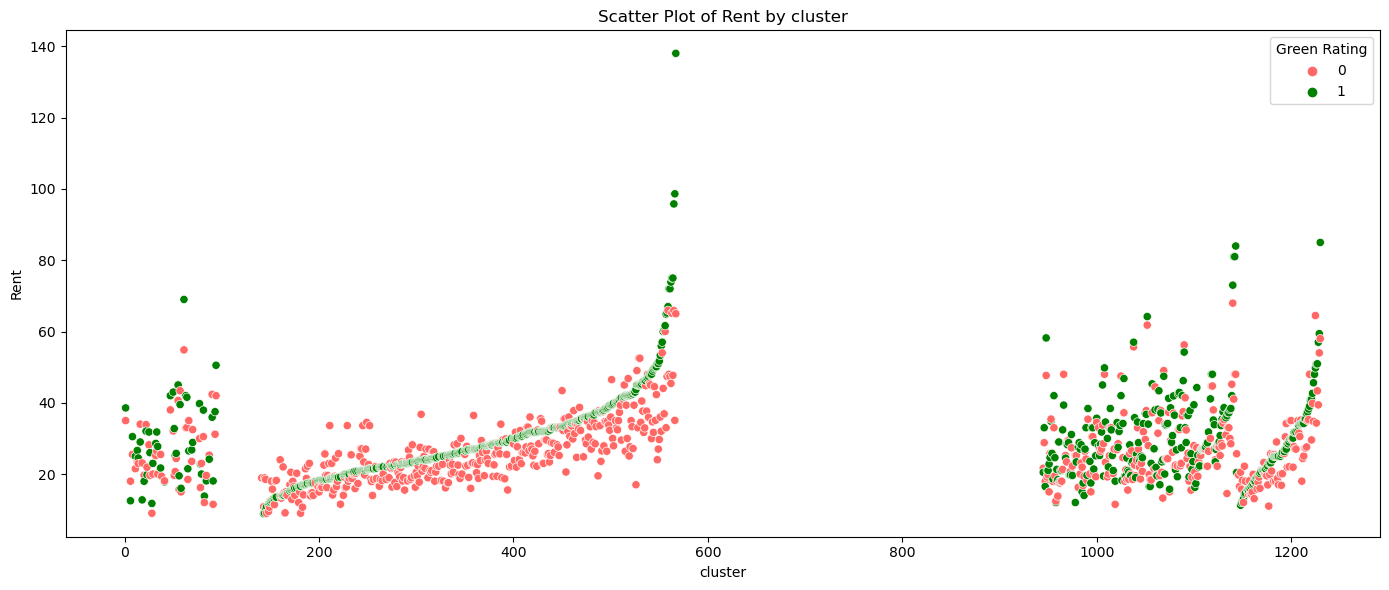

,cluster,green_rating,Rent,leasing_rate,CS_PropertyID
0,1,0,35.00,92.488000,5
1,1,1,38.56,91.390000,1
2,6,0,18.00,90.187778,9
3,6,1,12.50,94.330000,1
4,8,0,25.50,85.296364,11
...,...,...,...,...,...
1360,1228,1,57.00,86.400000,1
1361,1229,0,54.00,98.138000,5
1362,1229,1,59.40,93.790000,1
1363,1230,0,58.00,94.527059,51


In [178]:
cluster_effect = df_new.groupby(['cluster','green_rating']).agg({'Rent':'median','leasing_rate':'mean','CS_PropertyID':'count'}).reset_index().sort_values('cluster')

plt.figure(figsize=(14, 6))

sns.scatterplot(x='cluster', y='Rent', hue='green_rating', data=cluster_effect, palette=color_palette)
plt.xlabel('cluster')
plt.ylabel('Rent')
plt.title('Scatter Plot of Rent by cluster')
plt.legend(title='Green Rating')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

cluster_effect

In [215]:
median_val = 1 - 25.03/27.6 
print(median_val)

0.09311594202898554


Finding Clusters which can offer more Rent increase than the one in median

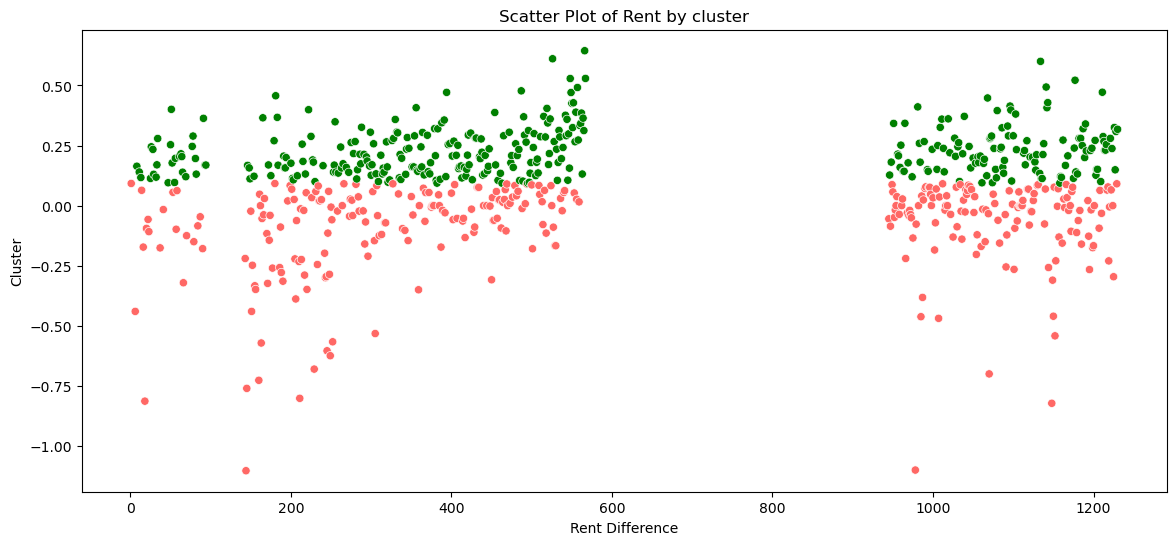

In [220]:
green_cluster = cluster_effect[cluster_effect['green_rating']==1][['cluster','Rent','leasing_rate']].set_index('cluster')

non_green_cluster = cluster_effect[cluster_effect['green_rating']==0][['cluster','Rent','leasing_rate']].set_index('cluster')

cluster_effect_updated = pd.merge(green_cluster,non_green_cluster,on ='cluster',suffixes = ('_green','_nongreen'))

cluster_effect_updated['Rent_diff'] = 1 - cluster_effect_updated['Rent_nongreen']/cluster_effect_updated['Rent_green']
cluster_effect_updated['Occupancy_diff'] = 1 - cluster_effect_updated['leasing_rate_nongreen']/cluster_effect_updated['leasing_rate_green']


color_palette2 = {key: 'green' if key > median_val else '#FF6865' for key in cluster_effect_updated['Rent_diff']}

plt.figure(figsize=(14, 6))
scatter_plot = sns.scatterplot(x='cluster', y='Rent_diff', data=cluster_effect_updated, hue ='Rent_diff' ,palette = color_palette2)
plt.xlabel('Rent Difference')
plt.ylabel('Cluster')
plt.title('Scatter Plot of Rent by cluster')
scatter_plot.legend().set_visible(False)

plt.show()


Finding Avg occupancy for there clusters (highlighted in green)

In [225]:
occupancy_for_the_good_loc_clusters  = cluster_effect_updated[cluster_effect_updated['Rent_diff'] > median_val].describe()
occupancy_for_the_good_loc_clusters

,Rent_green,leasing_rate_green,Rent_nongreen,leasing_rate_nongreen,Rent_diff,Occupancy_diff
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,32.964958,90.190652,24.861034,83.974883,0.228513,0.052667
std,14.398027,10.665076,9.103425,10.068450,0.101885,0.185274
min,10.810000,44.940000,9.000000,37.080000,0.093416,-1.086811
25%,24.000000,87.110000,18.500000,78.340714,0.149618,-0.002985
50%,30.600000,93.850000,23.100000,85.637059,0.208333,0.072806
75%,37.940000,97.890000,29.530000,90.928571,0.285714,0.144999
max,138.070000,100.000000,65.890000,100.000000,0.644501,0.610063


From above, we can safely say, that the green building from good location will give us a 93 % occupancy with the best rent increment of 7.5 dollars per sq ft, which is approximately 5 dollars more than the previous assumption. So we can make an additional of revenue of 5 * 250,000 = 1.25 million dollars per year.

### Final Insights and Conclusions:
Stats guru analysis seems fair but incomplete, including the below points in the analysis will help improve the profits and success of the project

- The additional revenue of 2.6 dollars per sq ft can be increased to 7.5 dollars if we consider the clusters shown in green in the above cluster chart, with an occupancy of 93 %
- A nuanced positive correlation exists between rent and occupancy rates. Notably, green buildings exhibit a marginally superior occupancy rate, potentially attributed to their relatively youthful age and enhanced public relations and advertising prospects.
- There isn't any correlation between the age and occupancy rate.
- Upon conducting a more in-depth examination, it became evident that there is a subtle yet positive correlation between rent and size. Additionally, green buildings tend to have an average size that is approximately 100,000 sq. ft. larger than that of non-green buildings. This size discrepancy could potentially serve as a confounding factor. However, additional data is required to validate this assertion conclusively.
- Its good to have amenities and class_a buildings, just because they have occupancy and thus can give good returns, simply due to demand and supply